In [1]:
from src.simulation_raw import ChargedParticlesSim
from src.particle_simulation import ParticleSimulation
from src.charged_particle_simulation import ChargedParticleSimulation
from src.charged_particle_external_field_simulation import ExternalFieldChargedParticleSimulation
from matplotlib import pyplot as plt
import time 
import numpy as np

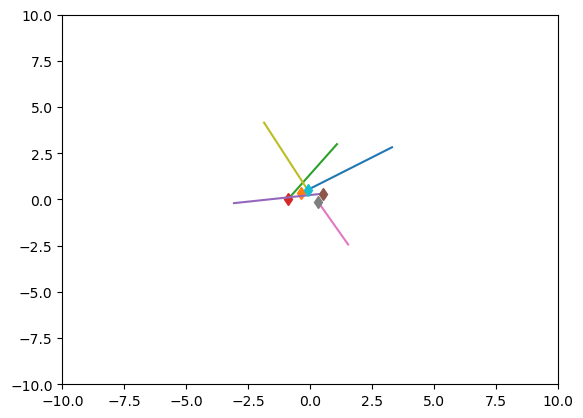

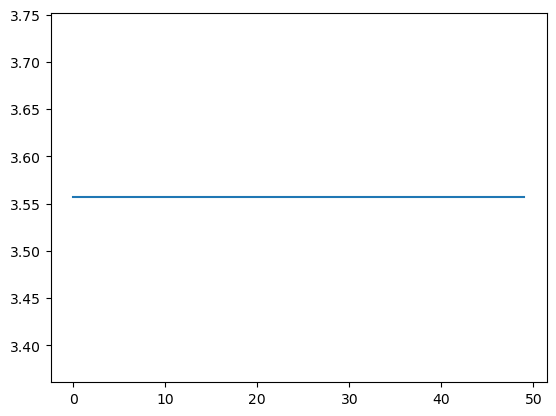

In [2]:
sim = ParticleSimulation()
sim.randomly_init_particles()
x_record, v_record, t_record = sim.sample_trajectory(n_iters=5000, sample_freq=100)
fig, ax = plt.subplots()
ax.set_xlim([-10., 10.])
ax.set_ylim([-10., 10.])
for i in range(x_record.shape[-1]):
    ax.plot(x_record[:, 0, i], x_record[:, 1, i])
    ax.plot(x_record[0, 0, i], x_record[0, 1, i], 'd')

fig, ax = plt.subplots()
energies = [sim._energy(x_record[i, :, :], v_record[i, :, :]) for i in
            range(x_record.shape[0])]
ax.plot(energies)

2.0


/home/wenqingxie/Particle-Simulation/src/simulation_raw.py:275: RuntimeWarning: invalid value encountered in power
  l2_dist_power3 = np.power(


[[ 1. -1. -1.  1. -1.]
 [-1.  1.  1. -1.  1.]
 [-1.  1.  1. -1.  1.]
 [ 1. -1. -1.  1. -1.]
 [-1.  1.  1. -1.  1.]]
Simulation time: 0.2291576862335205


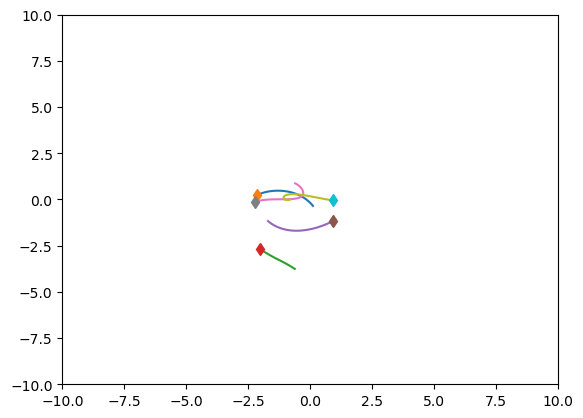

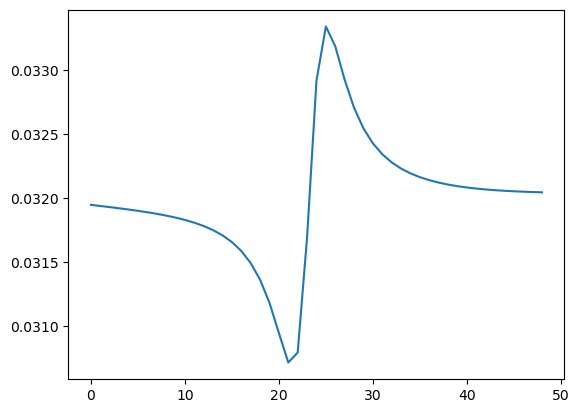

In [3]:
sim0 = ChargedParticlesSim(n_balls=5, loc_std=2)

t = time.time()
loc, vel, edges, charges = sim0.sample_trajectory(T=5000, sample_freq=100)

print(edges)
print("Simulation time: {}".format(time.time() - t))
vel_norm = np.sqrt((vel ** 2).sum(axis=1))
fig, ax = plt.subplots()
ax.set_xlim([-10., 10.])
ax.set_ylim([-10., 10.])
for i in range(loc.shape[-1]):
    ax.plot(loc[:, 0, i], loc[:, 1, i])
    ax.plot(loc[0, 0, i], loc[0, 1, i], 'd')


fig, ax = plt.subplots()
energies = [sim0._energy(loc[i, :, :], vel[i, :, :], edges) for i in
            range(loc.shape[0])]
ax.plot(energies)

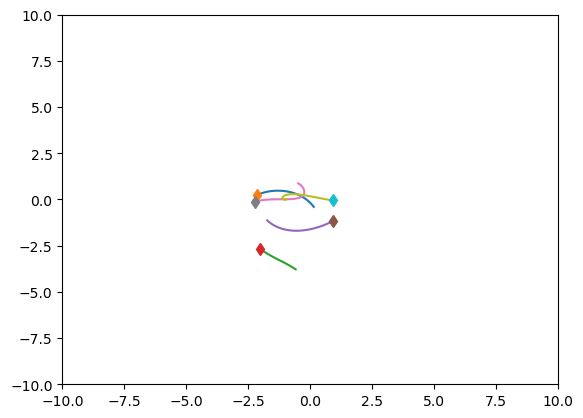

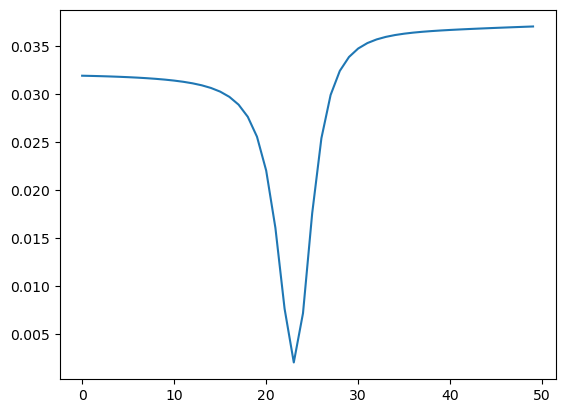

In [4]:
sim = ChargedParticleSimulation(box_size=1000)
sim.init_particles(x=loc[0],v=vel[0],m=np.ones(loc.shape[2]),e=charges.flatten())
x_record, v_record, t_record = sim.sample_trajectory(n_iters=5000, sample_freq=100)
fig, ax = plt.subplots()
ax.set_xlim([-10., 10.])
ax.set_ylim([-10., 10.])
for i in range(x_record.shape[-1]):
    ax.plot(x_record[:, 0, i], x_record[:, 1, i])
    ax.plot(x_record[0, 0, i], x_record[0, 1, i], 'd')

fig, ax = plt.subplots()
energies = [sim._energy(x_record[i, :, :], v_record[i, :, :]) for i in
            range(x_record.shape[0])]
ax.plot(energies)

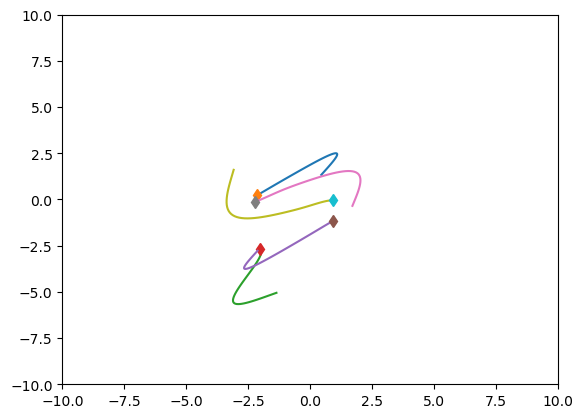

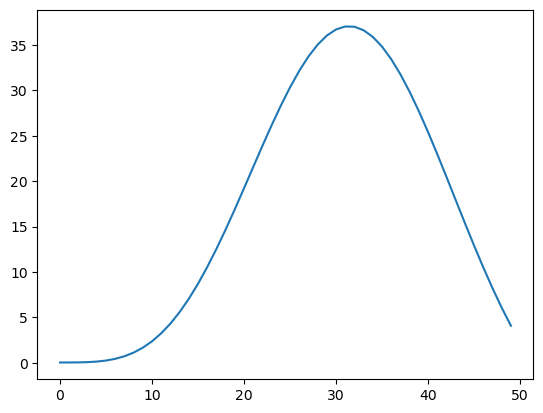

In [7]:
sim = ExternalFieldChargedParticleSimulation(box_size=1000)
sim.init_particles(x=loc[0],v=vel[0],m=np.ones(loc.shape[2]),e=charges.flatten())
sim.init_field(amplitude=np.array([1,0,0]), frequency=1, phase=0)
x_record, v_record, t_record = sim.sample_trajectory(n_iters=5000, sample_freq=100)
fig, ax = plt.subplots()
ax.set_xlim([-10., 10.])
ax.set_ylim([-10., 10.])
for i in range(x_record.shape[-1]):
    ax.plot(x_record[:, 0, i], x_record[:, 1, i])
    ax.plot(x_record[0, 0, i], x_record[0, 1, i], 'd')

fig, ax = plt.subplots()
energies = [sim._energy(x_record[i, :, :], v_record[i, :, :], t_record[i]) for i in
            range(x_record.shape[0])]
ax.plot(energies)